In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplos de regressão

### Lembrete:

- $\mathbf{\text{avg}}(\mathbf{x}) = \frac{1}{N}\mathbf{1}^T\mathbf{x}$
- $\mathbf{\text{std}}(\mathbf{x}) = \frac{\|x - \mathbf{\text{avg}}(x)\mathbf{1}\|}{\sqrt{N}}$
- $\mathbf{\text{rms}}(\mathbf{x}) = \frac{\|x\|}{\sqrt{N}}$

__Observação__: $arg\min_x \|Ax - b\|^2 = arg\min_x \mathbf{\text{rms}}(Ax - b)$

## Caso 1: aproximação por uma constante:
Dado um conjunto de dados $(x^{(j)}, b^{(j)})$, com $j = 1, ..., M$, queremos encontrar $f(y) = \hat{c}$ tal que $f(x^{(j)}) \approx b^{(j)}$ seja a melhor aproximação, no sentido de mínimos quadrados
$$
\begin{align*}
\hat{c} &= arg\min_c \|\mathbf{1} c - b\|^2 \\
&\Rightarrow \hat{c} = (\mathbf{1}^T\mathbf{1})^{-1}\mathbf{1}^T b\\
& = \frac{1}{M}\mathbf{1}^T b\\
& = \mathbf{\text{avg}}(\mathbf{b})
\end{align*}
$$

onde $b = [b^{(1)}, ..., b^{(M)}]^T$

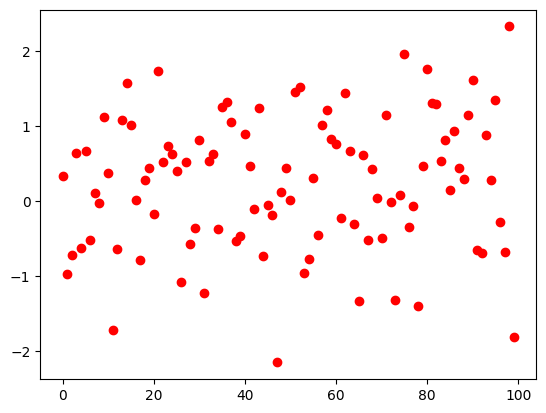

In [89]:
# Exemplo:
""" 
    1T 1 = M (dimensão do vetor A = c)

    quando estamos aproximando um conj de dados por uma constante, a melhor aproximação é pela constante
 
 """


m = 100

x = np.arange(m)

# multiplicar o b por d valor, faz o std se aproximar de d
# se somar o b com k, faz a avg se aproximar de k
b =  np.random.randn(m)

plt.plot(x,b,'ro')


C otimo: 0.23899788942929434

C: 0.2389978894292944


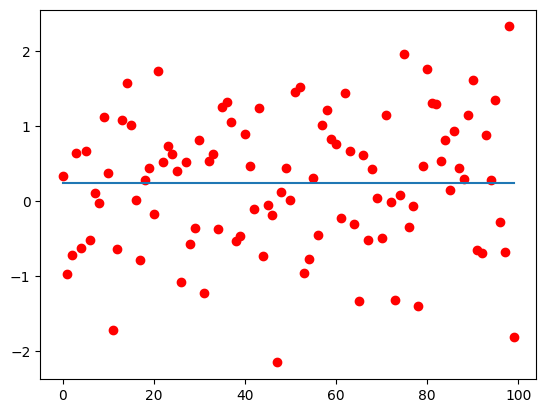

In [90]:
A = np.ones((m, 1))

# pega a primeira informação (aproximação) [0]
c = np.linalg.lstsq(A, b, rcond=0)[0]

c_otimo = b.mean()

print (f"\nC otimo: {c_otimo}")
print (f"\nC: {c[0]}")

f = lambda x: c

""" 
vetorização -> aplicar a função em cada elemento do vetor

 """

f = np.vectorize(f)

plt.plot(x, b, 'ro')
plt.plot(x, f(x))


### Erro da aproximação

Dado o vetor $x = [x^{(1)}, ..., x^{(M)}]^T$, temos:

$$
f(x) = \hat{c} \mathbf{1} = \mathbf{\text{avg}}(b)\mathbf{1}
$$

portanto:
$$
\begin{align*}
\mathbf{\text{rms}}(b - f(x)) &= \frac{\|b - f(x)\|}{\sqrt{M}}\\
&=\frac{\|b - \mathbf{\text{avg}}(b)\mathbf{1}\|}{\sqrt{M}}\\
&=\mathbf{\text{std}}(b)
\end{align*}
$$


In [91]:
std = b.std()

rms = np.linalg.norm(b - f(x)) / np.sqrt(m)

print (std, rms)

0.8945291117660537 0.8945291117660537


## Aproximação por uma Reta

Considere o mesmo conjunto de dados, mas que agora queremos aproximar por uma reta: $f(y) = \theta_1 + \theta_2 y$.

Como vimos, a solução é dada por:

$$
\begin{bmatrix}
\theta_1 \\ \theta_2
\end{bmatrix} = (A^TA)^{-1}A^Tb
$$

onde

$$
A = \begin{bmatrix}
1 & x^{(1)}\\
1 & x^{(2)}\\
\vdots & \vdots\\
1 & x^{(M)}\\
\end{bmatrix} = \begin{bmatrix}
\mathbf{1} & x
\end{bmatrix}.
$$

Sabemos que
$$
A^TA = \begin{bmatrix}
\mathbf{1}^T\mathbf{1} & \mathbf{1}^T x\\
\mathbf{1}^T x & x^T x
\end{bmatrix}= \begin{bmatrix}
M & \mathbf{1}^T x\\
\mathbf{1}^T x &\|x\|^2
\end{bmatrix},\, 
A^Tb = \begin{bmatrix}
\mathbf{1}^Tb \\ x^T b
\end{bmatrix}
$$

E, usando a formula da inversa de matrizes $2\times 2$, temos:

$$
\begin{align*}
\begin{bmatrix}
\theta_1 \\ \theta_2
\end{bmatrix} 
&= \frac{1}{M \|x\|^2 - (\mathbf{1}^Tx)^2}\begin{bmatrix}
\|x\|^2 & -\mathbf{1}^T x\\
-\mathbf{1}^T x & M
\end{bmatrix}\begin{bmatrix}
\mathbf{1}^Tb \\ x^T b
\end{bmatrix}\\\\
&= \frac{1}{M (M \mathbf{\text{rms}}(x)^2) - (M \mathbf{\text{avg}}(x))^2}\begin{bmatrix}
M \mathbf{\text{rms}}(x)^2 & -M \mathbf{\text{avg}}(x)\\
-M \mathbf{\text{avg}}(x) & M
\end{bmatrix}\begin{bmatrix}
M \mathbf{\text{avg}}(b) \\ x^T b
\end{bmatrix}\\\\
&= \frac{1}{M^2 \mathbf{\text{rms}}(x)^2 - M^2 \mathbf{\text{avg}}(x)^2} M \begin{bmatrix}
\mathbf{\text{rms}}(x)^2 & -\mathbf{\text{avg}}(x)\\
-\mathbf{\text{avg}}(x) & 1
\end{bmatrix} M\begin{bmatrix}
\mathbf{\text{avg}}(b) \\ \frac{x^T b}{M}
\end{bmatrix}\\\\
&= \frac{M^2}{M^2 [\mathbf{\text{rms}}(x)^2 - \mathbf{\text{avg}}(x)^2]} \begin{bmatrix}
\mathbf{\text{rms}}(x)^2 & -\mathbf{\text{avg}}(x)\\
-\mathbf{\text{avg}}(x) & 1
\end{bmatrix} \begin{bmatrix}
\mathbf{\text{avg}}(b) \\ \frac{x^T b}{M}
\end{bmatrix}\\\\
&= \frac{1}{\mathbf{\text{rms}}(x)^2 - \mathbf{\text{avg}}(x)^2} \begin{bmatrix}
\mathbf{\text{rms}}(x)^2 & -\mathbf{\text{avg}}(x)\\
-\mathbf{\text{avg}}(x) & 1
\end{bmatrix} \begin{bmatrix}
\mathbf{\text{avg}}(b) \\ \frac{x^T b}{M}
\end{bmatrix}\\\\
\end{align*}
$$

### Exercício:

Mostre que:

$\theta_1 = \mathbf{\text{avg}}(b) - \theta_2\mathbf{\text{avg}}(x)$

$\theta_2 = \rho \frac{\mathbf{\text{std}}(b)}{\mathbf{\text{std}}(x)}$

onde $\rho$ é o coeficiente de correlação entre $x$ e $b$
__Dica__: Para $\theta_1$, considere as equações normais $A^TA x = A^Tb$


### Conclusão:

$$
\begin{align*}
f(y) &= \mathbf{\text{avg}}(b) - \rho \frac{\mathbf{\text{std}}(b)}{\mathbf{\text{std}}(x)} \mathbf{\text{avg}}(x) + \rho \frac{\mathbf{\text{std}}(b)}{\mathbf{\text{std}}(x)} y\\
& = \mathbf{\text{avg}}(b) + \rho \frac{\mathbf{\text{std}}(b)}{\mathbf{\text{std}}(x)} (y - \mathbf{\text{avg}}(x))
\end{align*}
$$
### Erro da aproximação

Exercício 4 da lista

0.8945291117660537 0.8899409060490578
0.994870814536223


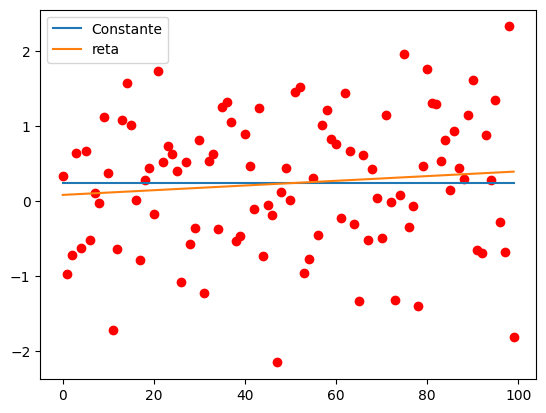

In [ ]:

B = np.ones((m, 2))

B[:, 1] = x

coef = np.linalg.lstsq(B, b, rcond= 0)[0]

f_2 = lambda x: coef[0] + x * coef[1]

f_2 = np.vectorize(f_2)

plt.plot(x, b, 'ro')
plt.plot(x, f(x), label='Constante')
plt.plot(x, f_2(x), label='reta')

c_corr = np.corrcoef(x, b)[0,1]
std = b.std()
err_reta = std * np.sqrt(1 - c_corr ** 2) 

print (std, err_reta)
print (np.sqrt(1 - c_corr ** 2))
plt.legend()

